In [42]:
# 2023 Gabriel J. Diaz @ RIT

import os
import sys
import numpy as np
import av
import logging
import pickle
from tqdm import tqdm


import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pathlib import Path, PurePath

import sys
sys.path.append('../..')
from flow_source import *

logger = logging.getLogger(__name__)
logger.addHandler(logging.StreamHandler(stream=sys.stdout))

In [43]:
sky = cv2.imread('sky.png')
bg = cv2.imread('bg.png')

sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2HSV)

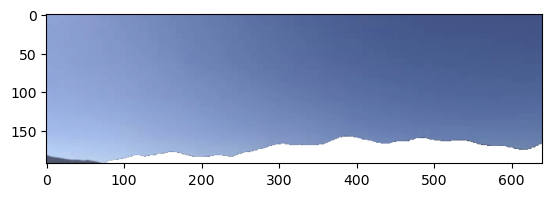

In [44]:
plt.imshow(cv2.cvtColor(sky, cv2.COLOR_HSV2RGB))

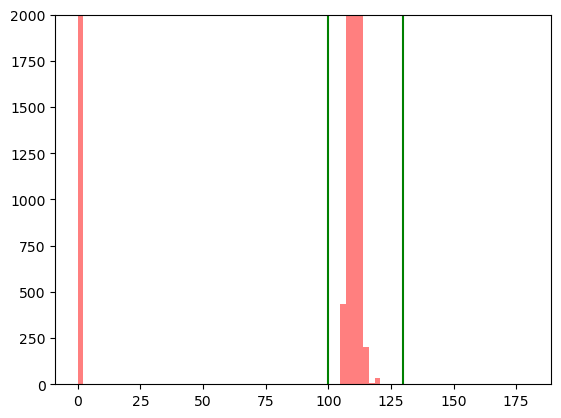

In [49]:
plt.hist(sky[...,0].flatten(),color='red',alpha=0.5, bins=np.linspace(0,180,80));
# plt.hist(bg[...,0].flatten(),color='blue',alpha=0.5, bins=np.linspace(0,180,80));

# plt.set_ylim(0,10000)
plt.ylim([0,2000])
plt.vlines(x = 100, ymin=0, ymax=10000,colors='g')
plt.vlines(x = 130, ymin=0, ymax=10000,colors='g')

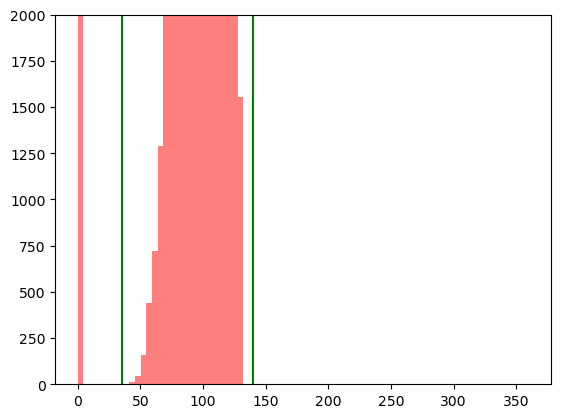

In [50]:
plt.hist(sky[...,1].flatten(),color='red',alpha=0.5, bins=np.linspace(0,360,80));
# plt.hist(bg[...,1].flatten(),color='blue',alpha=0.5, bins=np.linspace(0,360,80));

# plt.set_ylim(0,10000)
plt.ylim([0,2000])
plt.vlines(x = 35, ymin=0, ymax=2000,colors='g')
plt.vlines(x = 140, ymin=0, ymax=2000,colors='g')

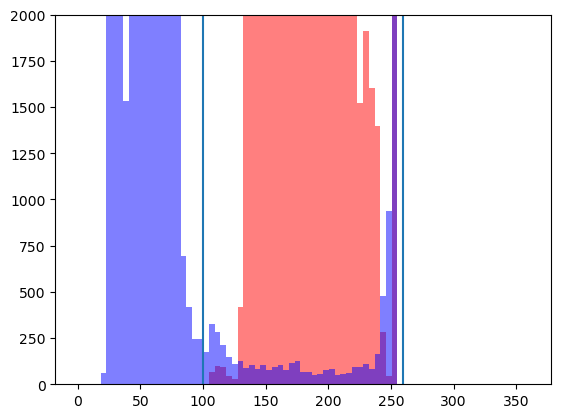

In [52]:
plt.hist(sky[...,2].flatten(),color='red',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(bg[...,2].flatten(),color='blue',alpha=0.5, bins=np.linspace(0,360,80));

# plt.set_ylim(0,10000)
plt.ylim([0,2000])
plt.vlines(x = 100, ymin=0, ymax=10000)
plt.vlines(x = 260, ymin=0, ymax=10000)

In [53]:
lower = np.array([100, 45, 125])
upper = np.array([120, 140,260])

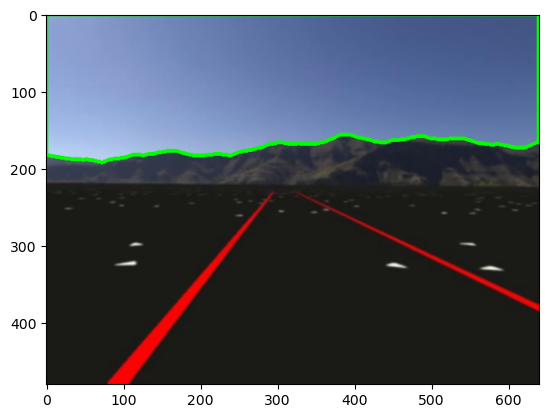

In [55]:
frame = cv2.imread(os.path.join('world_image_out','25.jpg'))
frame = cv2.GaussianBlur(frame, (5, 5), 0)

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    
mask = cv2.inRange(hsv, lower, upper)
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)
    
#     area = cv2.contourArea(contour)
#     if area > 5000:
#          # -- Draw Option 1 --
#          cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)

#          # -- Draw Option 2--
#          # rect = cv2.boundingRect(contour)
#          # x, y, w, h = rect
#          # cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# cv2.imshow("Mask", mask)
# cv2.imshow("Frame", frame)

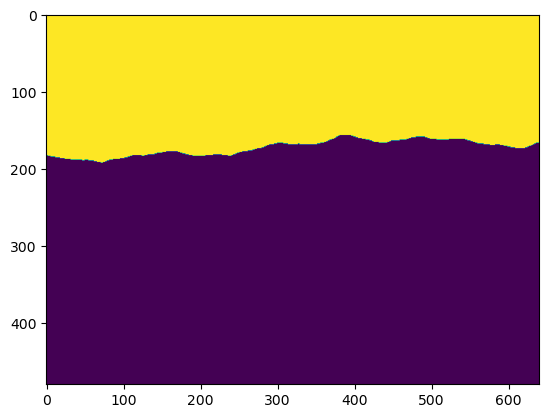

In [56]:
plt.imshow(mask)

# SKy

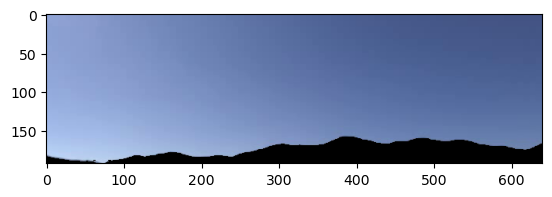

In [57]:
frame = cv2.imread('sky.png')
# frame = cv2.GaussianBlur(frame, (5, 5), 0)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower = np.array([100, 45, 125])
upper = np.array([120, 140,260])

mask = cv2.inRange(hsv, lower, upper)
plt.imshow(cv2.cvtColor(cv2.bitwise_and(frame,frame,mask = mask),cv2.COLOR_BGR2RGB))

In [58]:
sky = cv2.imread('sky.png')
sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)

for i in np.arange(3):
    print(f'{i}) {np.min(sky[...,i])} - {np.max(sky[...,i])}')

0) 0 - 120
1) 0 - 130
2) 103 - 255


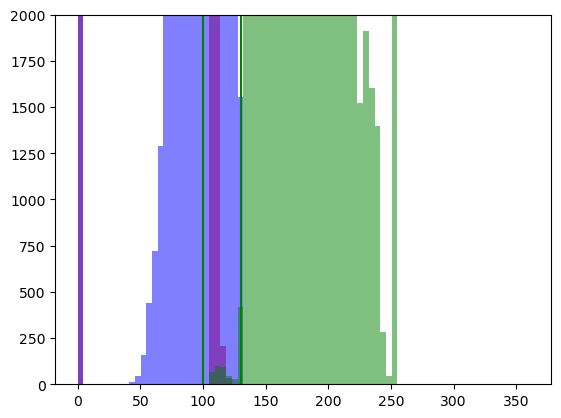

In [59]:
sky = cv2.imread('sky.png')
sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)
plt.hist(sky[...,0].flatten(),color='red',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(sky[...,1].flatten(),color='blue',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(sky[...,2].flatten(),color='green',alpha=0.5, bins=np.linspace(0,360,80));

plt.ylim([0,2000])
plt.vlines(x = 100, ymin=0, ymax=10000,colors='g')
plt.vlines(x = 130, ymin=0, ymax=10000,colors='g')


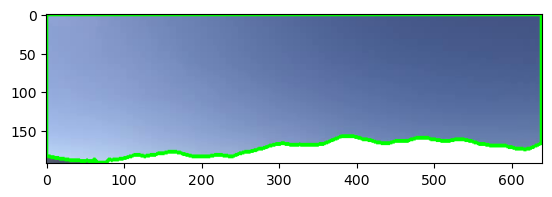

In [60]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)
    
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))



# Iterate